In [50]:
import csv
import numpy as np
import ast

In [51]:
with open('sdf.csv') as csv_file:
    reader = csv.reader(csv_file)
    data = dict(reader)

train_x = np.array(ast.literal_eval(data['train_x'])).reshape(-1,1)
train_y = np.array(ast.literal_eval(data['train_y'])).reshape(-1,1)
train_sdf = np.array(ast.literal_eval(data['train_sdf'])).reshape(-1,1)
test_x = np.array(ast.literal_eval(data['test_x'])).reshape(-1,1)
test_y = np.array(ast.literal_eval(data['test_y'])).reshape(-1,1)
test_sdf = np.array(ast.literal_eval(data['test_sdf'])).reshape(-1,1)
test_sdf.shape

(3268, 1)

In [52]:
from GP import GaussianProcess, plot_GP, radial_basis, linear_kernel
import matplotlib.pyplot as plt
from matplotlib import cm

## Q4.2

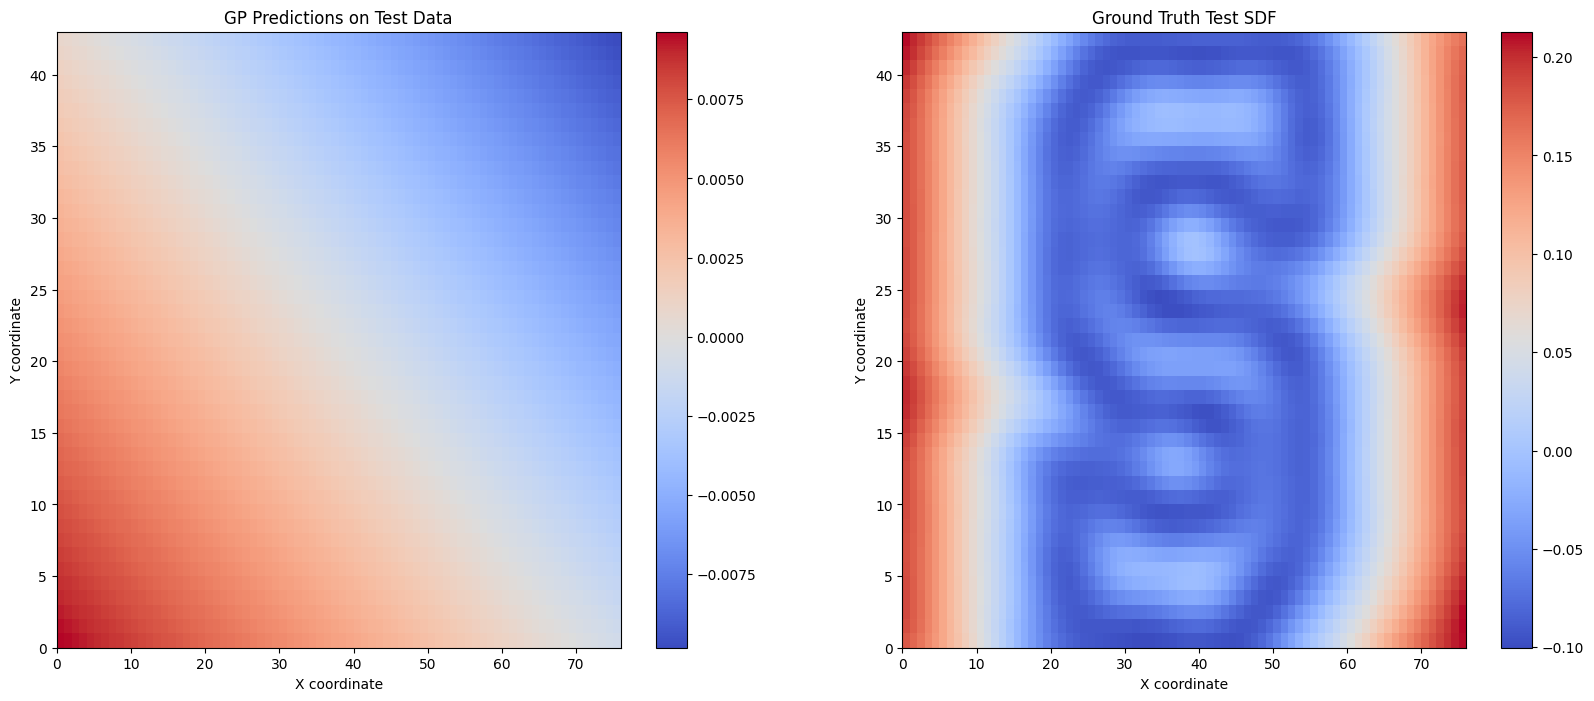

The parameters for linear kernel:sig=2.0, l=.1
It underfit the data, since the data's underlying relationship is non-linear while the linear kernel assumes a linear relationship between inputs.


In [55]:
np.random.seed(0)

# Normalize (train)
train_data = np.hstack((train_x, train_y))
mean_data = np.mean(train_data, axis=0)
std_data = np.std(train_data, axis=0)
train_data_normalized = (train_data - mean_data) / std_data

# gaussian process linear kernel
gp = GaussianProcess(train_data_normalized, train_sdf, kernel_func=linear_kernel)

# Normalize (test)
test_data = np.hstack((test_x, test_y))
test_data_normalized = (test_data - mean_data) / std_data

# Predict using Gaussian Process on normalized test data
mu_test, Sigma_test = gp.compute_posterior(test_data_normalized)

mu_test_reshaped = mu_test.reshape(43, 76) # reshape the predicted mean to fit the test data grid
ground_truth_sdf_test = test_sdf.reshape(43, 76) # Reshape the ground truth: test SDF
mu_test_reshaped = np.fliplr(mu_test_reshaped)
ground_truth_sdf_test = np.fliplr(ground_truth_sdf_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gaussian Process predictions on test data
c1 = ax1.pcolormesh(mu_test_reshaped, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title('GP Predictions on Test Data')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')

# Ground truth test SDF
c2 = ax2.pcolormesh(ground_truth_sdf_test, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c2, ax=ax2)
ax2.set_title('Ground Truth Test SDF')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')

plt.show()

print("The parameters for linear kernel:sig=2.0, l=.1")

print("It underfit the data, since the data's underlying relationship is non-linear while the linear kernel assumes a linear relationship between inputs.")


## Q4.4

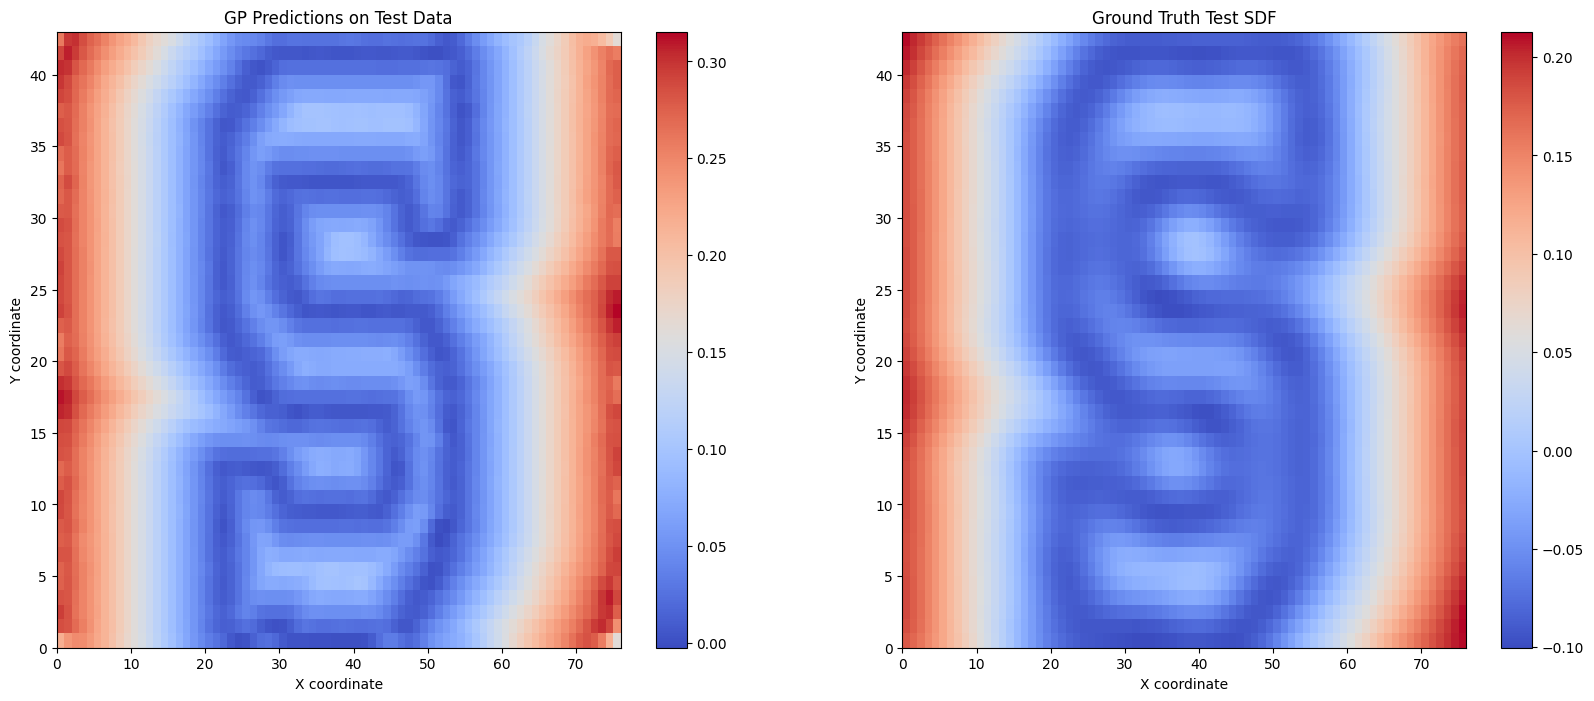

The parameters for RBF kernel: sig=1.0, l=.09, p=1.
RBF kernel better fits the data as its more flexible due to its ability to capture more complex patterns.


In [56]:
np.random.seed(0)

# Normalize (train)
train_data = np.column_stack((train_x, train_y))
mean_data = np.mean(train_data, axis=0)
std_data = np.std(train_data, axis=0)
train_data_normalized = (train_data - mean_data) / std_data

# gaussian process - rbf kernel
gp = GaussianProcess(train_data_normalized, train_sdf.reshape(-1, 1), kernel_func=radial_basis)

# Normalize (test)
test_data = np.column_stack((test_x, test_y))
test_data_normalized = (test_data - mean_data) / std_data

# Predict using Gaussian Process on normalized test data
mu_test, Sigma_test = gp.compute_posterior(test_data_normalized)

mu_test_reshaped = mu_test.reshape(43, -76) # reshape the predicted mean to fit the test data grid
ground_truth_sdf_test = test_sdf.reshape(43, -76) # Reshape the ground truth: test SDF
mu_test_reshaped = np.fliplr(mu_test_reshaped)
ground_truth_sdf_test = np.fliplr(ground_truth_sdf_test)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gaussian Process predictions on test data
c1 = ax1.pcolormesh(mu_test_reshaped, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c1, ax=ax1)
ax1.set_title('GP Predictions on Test Data')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')

# Ground truth test SDF
c2 = ax2.pcolormesh(ground_truth_sdf_test, cmap=cm.coolwarm, shading='auto')
fig.colorbar(c2, ax=ax2)
ax2.set_title('Ground Truth Test SDF')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')

plt.show()


print("The parameters for RBF kernel: sig=1.0, l=.09, p=1.")
print("RBF kernel better fits the data as its more flexible due to its ability to capture more complex patterns.")
